## Processing of Single File

In [3]:
import xml.etree.ElementTree as ET

# Parse the mzML file
mzml_file = '../data/msnlib/mzml/20240408_pluskal_mcedrug_MSn_positive/20240408_pluskal_fda_drugs_5005_A3_id_MSn_positive.mzML'

# Define the namespace (mzML files use namespaces)
namespace = {'mzml': 'http://psi.hupo.org/ms/mzml'}

# Parse and count spectra
tree = ET.parse(mzml_file)
root = tree.getroot()

# Find all spectrum elements
spectra = root.findall('.//mzml:spectrum', namespace)
num_spectra = len(spectra)

print(f"Number of spectra in the file: {num_spectra}")

# Optional: Get some additional info about the spectra
if num_spectra > 0:
    print(f"\nFirst spectrum ID: {spectra[0].get('id')}")
    print(f"Last spectrum ID: {spectra[-1].get('id')}")

Number of spectra in the file: 972

First spectrum ID: controllerType=0 controllerNumber=1 scan=1
Last spectrum ID: controllerType=0 controllerNumber=1 scan=972


Total spectra: 972

Datapoints per spectrum statistics:
  Mean: 3517.82
  Median: 657.50
  Std Dev: 5658.42
  Min: 88
  Max: 16237
  Total datapoints: 3419324

Quartiles:
  25th percentile: 456.75
  75th percentile: 1281.50


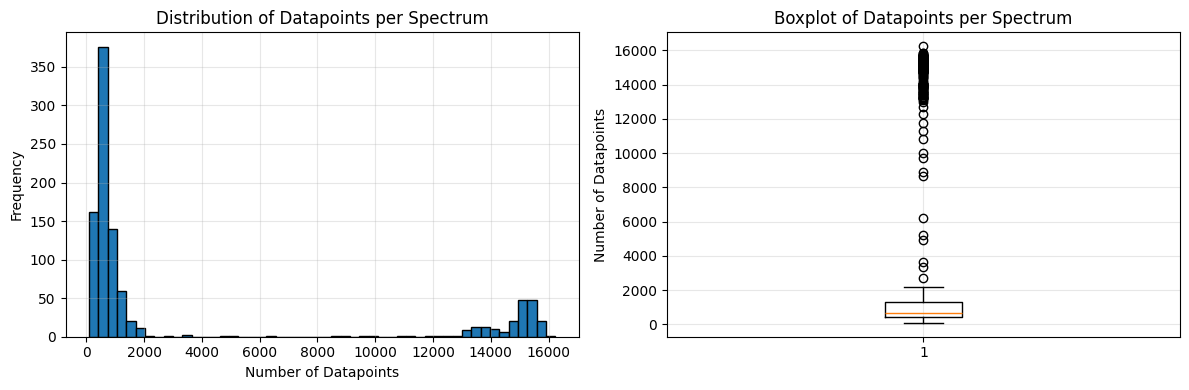

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Count datapoints in each spectrum
datapoint_counts = []

for spectrum in spectra:
    # Find binary data arrays (m/z and intensity arrays)
    binary_arrays = spectrum.findall('.//mzml:binaryDataArray', namespace)
    
    # Get the number of datapoints from the defaultArrayLength attribute
    default_array_length = spectrum.get('defaultArrayLength')
    if default_array_length:
        datapoint_counts.append(int(default_array_length))

datapoint_counts = np.array(datapoint_counts)

# Statistical analysis
print(f"Total spectra: {len(datapoint_counts)}")
print(f"\nDatapoints per spectrum statistics:")
print(f"  Mean: {np.mean(datapoint_counts):.2f}")
print(f"  Median: {np.median(datapoint_counts):.2f}")
print(f"  Std Dev: {np.std(datapoint_counts):.2f}")
print(f"  Min: {np.min(datapoint_counts)}")
print(f"  Max: {np.max(datapoint_counts)}")
print(f"  Total datapoints: {np.sum(datapoint_counts)}")

# Quartiles
print(f"\nQuartiles:")
print(f"  25th percentile: {np.percentile(datapoint_counts, 25):.2f}")
print(f"  75th percentile: {np.percentile(datapoint_counts, 75):.2f}")

# Distribution visualization
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(datapoint_counts, bins=50, edgecolor='black')
plt.xlabel('Number of Datapoints')
plt.ylabel('Frequency')
plt.title('Distribution of Datapoints per Spectrum')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.boxplot(datapoint_counts, vert=True)
plt.ylabel('Number of Datapoints')
plt.title('Boxplot of Datapoints per Spectrum')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Processing of Directory

Found 339 mzML files in the directory

Processing: 20240408_pluskal_fda_drugs_5005_A10_id_MSn_positive.mzML
Processing: 20240408_pluskal_fda_drugs_5005_A11_id_MSn_positive.mzML
Processing: 20240408_pluskal_fda_drugs_5005_A12_id_MSn_positive.mzML
Processing: 20240408_pluskal_fda_drugs_5005_A13_id_MSn_positive.mzML
Processing: 20240408_pluskal_fda_drugs_5005_A14_id_MSn_positive.mzML
Processing: 20240408_pluskal_fda_drugs_5005_A15_id_MSn_positive.mzML
Processing: 20240408_pluskal_fda_drugs_5005_A16_id_MSn_positive.mzML
Processing: 20240408_pluskal_fda_drugs_5005_A17_id_MSn_positive.mzML
Processing: 20240408_pluskal_fda_drugs_5005_A18_id_MSn_positive.mzML
Processing: 20240408_pluskal_fda_drugs_5005_A19_id_MSn_positive.mzML
Processing: 20240408_pluskal_fda_drugs_5005_A20_id_MSn_positive.mzML
Processing: 20240408_pluskal_fda_drugs_5005_A21_id_MSn_positive.mzML
Processing: 20240408_pluskal_fda_drugs_5005_A22_id_MSn_positive.mzML
Processing: 20240408_pluskal_fda_drugs_5005_A3_id_MSn_positive.m

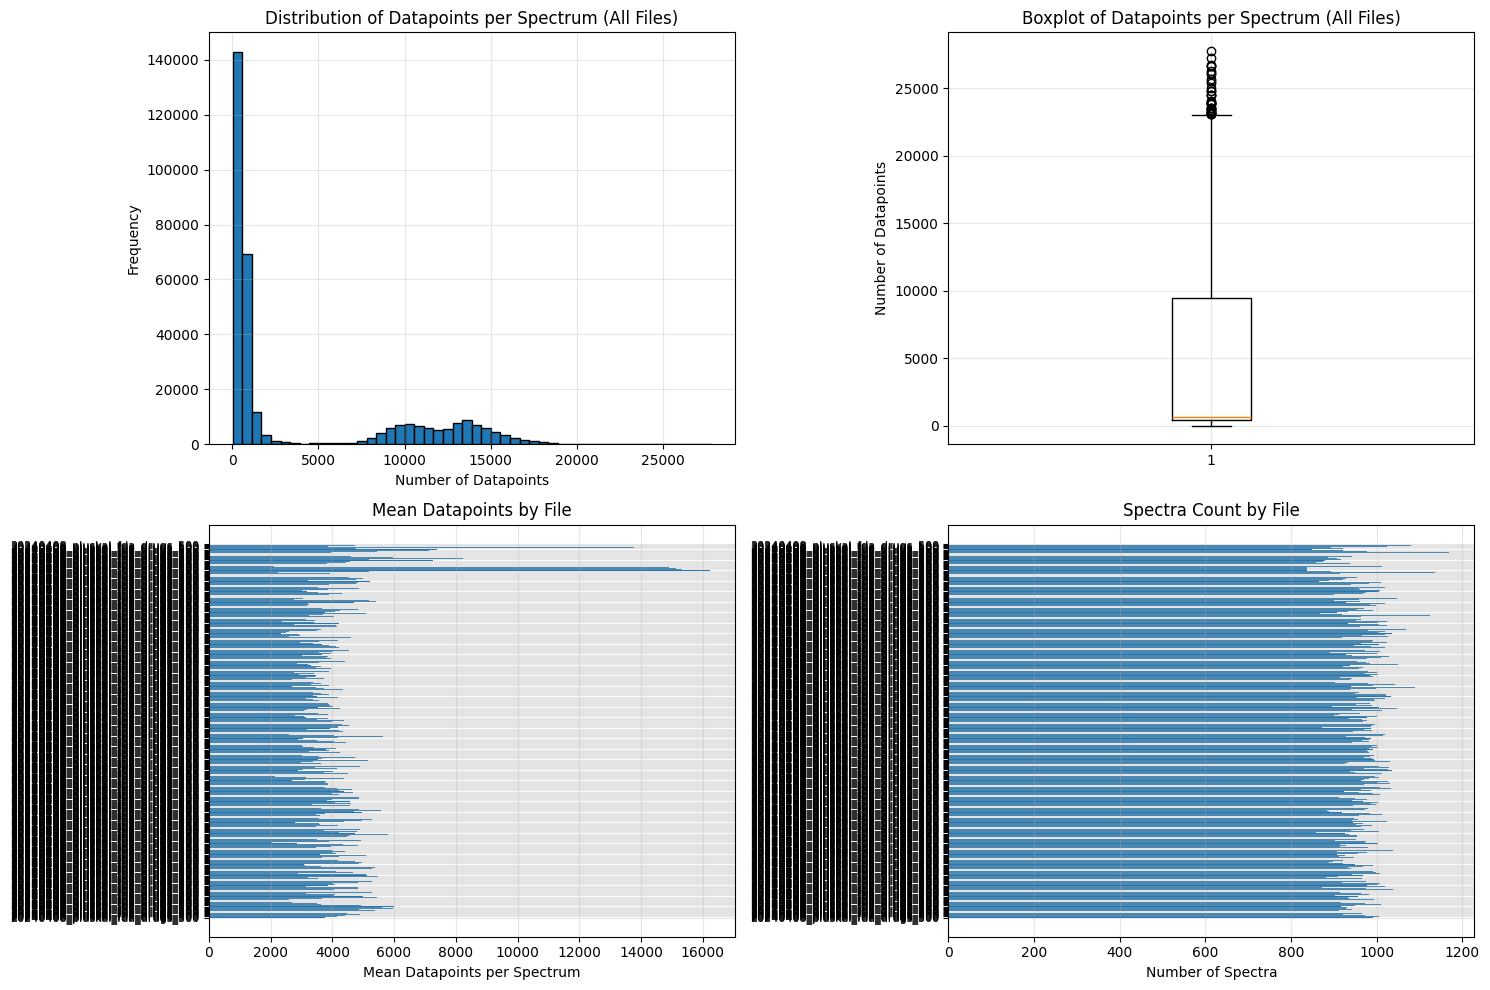

In [5]:
import os
import glob

# Directory containing mzML files
mzml_dir = '../data/msnlib/mzml/20240408_pluskal_mcedrug_MSn_positive'

# Find all mzML files in the directory
mzml_files = glob.glob(os.path.join(mzml_dir, '*.mzML'))
print(f"Found {len(mzml_files)} mzML files in the directory\n")

# Store statistics for all files
all_datapoint_counts = []
file_stats = []

# Process each file
for mzml_file in sorted(mzml_files):
    filename = os.path.basename(mzml_file)
    print(f"Processing: {filename}")
    
    # Parse the file
    tree = ET.parse(mzml_file)
    root = tree.getroot()
    
    # Find all spectrum elements
    spectra = root.findall('.//mzml:spectrum', namespace)
    
    # Count datapoints in each spectrum
    datapoint_counts = []
    for spectrum in spectra:
        default_array_length = spectrum.get('defaultArrayLength')
        if default_array_length:
            datapoint_counts.append(int(default_array_length))
    
    datapoint_counts = np.array(datapoint_counts)
    
    # Store for overall statistics
    all_datapoint_counts.extend(datapoint_counts)
    
    # Calculate and store statistics for this file
    file_stats.append({
        'filename': filename,
        'num_spectra': len(datapoint_counts),
        'mean': np.mean(datapoint_counts),
        'median': np.median(datapoint_counts),
        'std': np.std(datapoint_counts),
        'min': np.min(datapoint_counts),
        'max': np.max(datapoint_counts),
        'total_datapoints': np.sum(datapoint_counts)
    })

# Convert to numpy array for overall statistics
all_datapoint_counts = np.array(all_datapoint_counts)

print("\n" + "="*80)
print("OVERALL STATISTICS (All Files Combined)")
print("="*80)
print(f"Total files: {len(mzml_files)}")
print(f"Total spectra: {len(all_datapoint_counts)}")
print(f"\nDatapoints per spectrum statistics:")
print(f"  Mean: {np.mean(all_datapoint_counts):.2f}")
print(f"  Median: {np.median(all_datapoint_counts):.2f}")
print(f"  Std Dev: {np.std(all_datapoint_counts):.2f}")
print(f"  Min: {np.min(all_datapoint_counts)}")
print(f"  Max: {np.max(all_datapoint_counts)}")
print(f"  Total datapoints: {np.sum(all_datapoint_counts)}")

print(f"\nQuartiles:")
print(f"  25th percentile: {np.percentile(all_datapoint_counts, 25):.2f}")
print(f"  75th percentile: {np.percentile(all_datapoint_counts, 75):.2f}")

# Print individual file statistics
print("\n" + "="*80)
print("PER-FILE STATISTICS")
print("="*80)
for stats in file_stats:
    print(f"\n{stats['filename']}:")
    print(f"  Spectra: {stats['num_spectra']}")
    print(f"  Mean datapoints: {stats['mean']:.2f}")
    print(f"  Median datapoints: {stats['median']:.2f}")
    print(f"  Min-Max: {stats['min']}-{stats['max']}")
    print(f"  Total datapoints: {stats['total_datapoints']}")

# Visualization
plt.figure(figsize=(15, 10))

# Overall distribution
plt.subplot(2, 2, 1)
plt.hist(all_datapoint_counts, bins=50, edgecolor='black')
plt.xlabel('Number of Datapoints')
plt.ylabel('Frequency')
plt.title('Distribution of Datapoints per Spectrum (All Files)')
plt.grid(True, alpha=0.3)

# Overall boxplot
plt.subplot(2, 2, 2)
plt.boxplot(all_datapoint_counts, vert=True)
plt.ylabel('Number of Datapoints')
plt.title('Boxplot of Datapoints per Spectrum (All Files)')
plt.grid(True, alpha=0.3)

# Mean datapoints per file
plt.subplot(2, 2, 3)
file_names = [s['filename'][:30] for s in file_stats]  # Truncate long names
means = [s['mean'] for s in file_stats]
plt.barh(range(len(file_names)), means)
plt.yticks(range(len(file_names)), file_names, fontsize=8)
plt.xlabel('Mean Datapoints per Spectrum')
plt.title('Mean Datapoints by File')
plt.grid(True, alpha=0.3)

# Total spectra per file
plt.subplot(2, 2, 4)
num_spectra = [s['num_spectra'] for s in file_stats]
plt.barh(range(len(file_names)), num_spectra)
plt.yticks(range(len(file_names)), file_names, fontsize=8)
plt.xlabel('Number of Spectra')
plt.title('Spectra Count by File')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Binning

Processing: 20240408_pluskal_fda_drugs_5005_A10_id_MSn_positive.mzML
Processing: 20240408_pluskal_fda_drugs_5005_A11_id_MSn_positive.mzML
Processing: 20240408_pluskal_fda_drugs_5005_A12_id_MSn_positive.mzML
Processing: 20240408_pluskal_fda_drugs_5005_A13_id_MSn_positive.mzML
Processing: 20240408_pluskal_fda_drugs_5005_A14_id_MSn_positive.mzML
Processing: 20240408_pluskal_fda_drugs_5005_A15_id_MSn_positive.mzML
Processing: 20240408_pluskal_fda_drugs_5005_A16_id_MSn_positive.mzML
Processing: 20240408_pluskal_fda_drugs_5005_A17_id_MSn_positive.mzML
Processing: 20240408_pluskal_fda_drugs_5005_A18_id_MSn_positive.mzML
Processing: 20240408_pluskal_fda_drugs_5005_A19_id_MSn_positive.mzML
Processing: 20240408_pluskal_fda_drugs_5005_A20_id_MSn_positive.mzML
Processing: 20240408_pluskal_fda_drugs_5005_A21_id_MSn_positive.mzML
Processing: 20240408_pluskal_fda_drugs_5005_A22_id_MSn_positive.mzML
Processing: 20240408_pluskal_fda_drugs_5005_A3_id_MSn_positive.mzML
Processing: 20240408_pluskal_fda_dr

/tmp/ipykernel_116438/680375466.py:160: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([mz_mins, mz_maxs], labels=['Min m/z', 'Max m/z'])


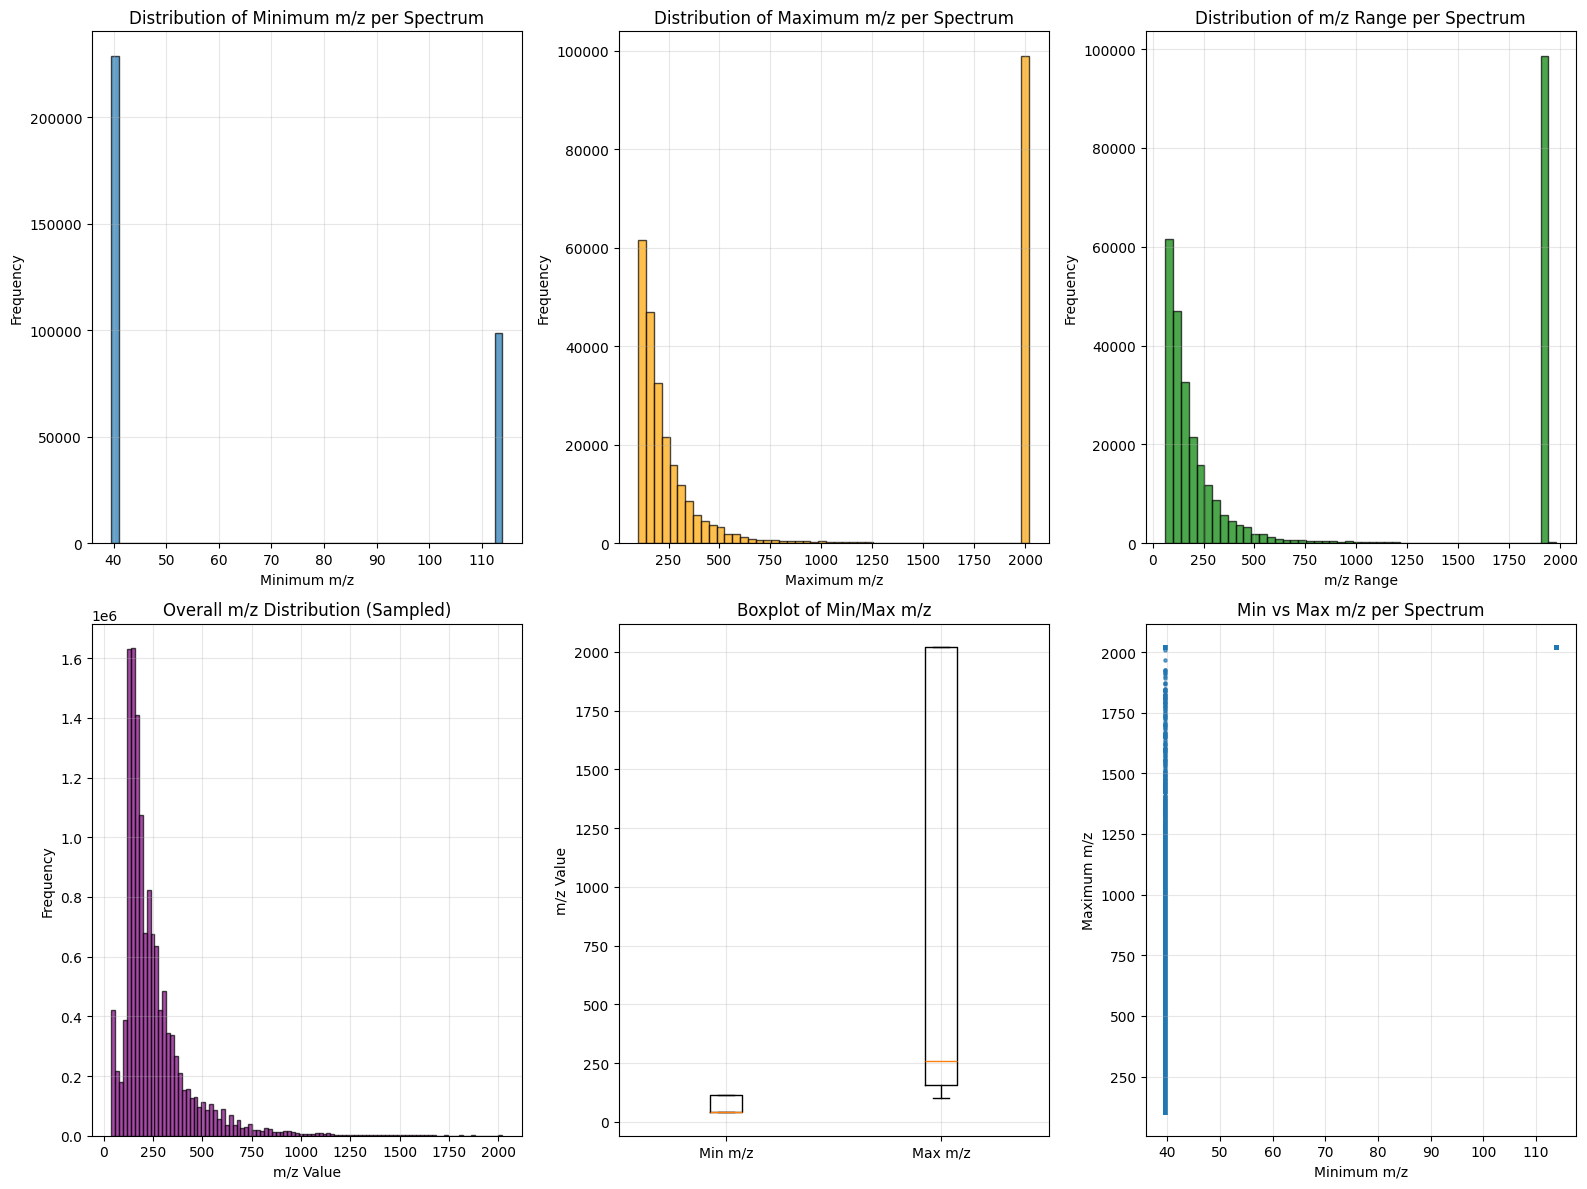

In [6]:
import base64
import struct
import zlib

def parse_binary_array(binary_array, namespace):
    """Parse a binary data array from mzML format."""
    cv_params = binary_array.findall('.//mzml:cvParam', namespace)
    
    is_mz = any(param.get('name') == 'm/z array' for param in cv_params)
    is_compressed = any(param.get('name') == 'zlib compression' for param in cv_params)
    is_64bit = any(param.get('name') == '64-bit float' for param in cv_params)
    
    binary_elem = binary_array.find('.//mzml:binary', namespace)
    if binary_elem is not None and binary_elem.text and is_mz:
        decoded_data = base64.b64decode(binary_elem.text)
        
        if is_compressed:
            decoded_data = zlib.decompress(decoded_data)
        
        fmt = 'd' if is_64bit else 'f'
        num_values = len(decoded_data) // (8 if is_64bit else 4)
        values = struct.unpack(f'<{num_values}{fmt}', decoded_data)
        return np.array(values, dtype=np.float32)
    
    return None

# Collect m/z range statistics
mz_mins = []
mz_maxs = []
mz_ranges = []
mz_all_values = []  # For global distribution (sample to save memory)

file_mz_stats = []

for mzml_file in sorted(mzml_files):
    filename = os.path.basename(mzml_file)
    print(f"Processing: {filename}")
    
    tree = ET.parse(mzml_file)
    root = tree.getroot()
    spectra = root.findall('.//mzml:spectrum', namespace)
    
    file_mins = []
    file_maxs = []
    
    for spectrum in spectra:
        binary_arrays = spectrum.findall('.//mzml:binaryDataArray', namespace)
        
        for binary_array in binary_arrays:
            mz_array = parse_binary_array(binary_array, namespace)
            
            if mz_array is not None and len(mz_array) > 0:
                mz_min = np.min(mz_array)
                mz_max = np.max(mz_array)
                
                mz_mins.append(mz_min)
                mz_maxs.append(mz_max)
                mz_ranges.append(mz_max - mz_min)
                file_mins.append(mz_min)
                file_maxs.append(mz_max)
                
                # Sample some values for distribution (every 100th value)
                mz_all_values.extend(mz_array[::100].tolist())
    
    if file_mins:
        file_mz_stats.append({
            'filename': filename,
            'global_min': np.min(file_mins),
            'global_max': np.max(file_maxs),
            'mean_min': np.mean(file_mins),
            'mean_max': np.mean(file_maxs),
            'num_spectra': len(file_mins)
        })

# Convert to numpy arrays
mz_mins = np.array(mz_mins)
mz_maxs = np.array(mz_maxs)
mz_ranges = np.array(mz_ranges)
mz_all_values = np.array(mz_all_values)

# Print comprehensive statistics
print("\n" + "="*80)
print("M/Z RANGE STATISTICS (All Spectra)")
print("="*80)

print(f"\nTotal spectra analyzed: {len(mz_mins)}")

print(f"\n--- Minimum m/z per Spectrum ---")
print(f"  Global min: {np.min(mz_mins):.4f}")
print(f"  Global max: {np.max(mz_mins):.4f}")
print(f"  Mean: {np.mean(mz_mins):.4f}")
print(f"  Median: {np.median(mz_mins):.4f}")
print(f"  Std Dev: {np.std(mz_mins):.4f}")
print(f"  25th percentile: {np.percentile(mz_mins, 25):.4f}")
print(f"  75th percentile: {np.percentile(mz_mins, 75):.4f}")

print(f"\n--- Maximum m/z per Spectrum ---")
print(f"  Global min: {np.min(mz_maxs):.4f}")
print(f"  Global max: {np.max(mz_maxs):.4f}")
print(f"  Mean: {np.mean(mz_maxs):.4f}")
print(f"  Median: {np.median(mz_maxs):.4f}")
print(f"  Std Dev: {np.std(mz_maxs):.4f}")
print(f"  25th percentile: {np.percentile(mz_maxs, 25):.4f}")
print(f"  75th percentile: {np.percentile(mz_maxs, 75):.4f}")

print(f"\n--- m/z Range per Spectrum (max - min) ---")
print(f"  Min range: {np.min(mz_ranges):.4f}")
print(f"  Max range: {np.max(mz_ranges):.4f}")
print(f"  Mean range: {np.mean(mz_ranges):.4f}")
print(f"  Median range: {np.median(mz_ranges):.4f}")
print(f"  Std Dev: {np.std(mz_ranges):.4f}")

print(f"\n--- Overall m/z Distribution (sampled) ---")
print(f"  Absolute min: {np.min(mz_all_values):.4f}")
print(f"  Absolute max: {np.max(mz_all_values):.4f}")
print(f"  Mean: {np.mean(mz_all_values):.4f}")
print(f"  Median: {np.median(mz_all_values):.4f}")

# Per-file summary
print("\n" + "="*80)
print("PER-FILE M/Z RANGE SUMMARY")
print("="*80)
for stats in file_mz_stats:
    print(f"\n{stats['filename'][:50]}:")
    print(f"  Spectra: {stats['num_spectra']}")
    print(f"  m/z range: [{stats['global_min']:.2f} - {stats['global_max']:.2f}]")

# Visualization
plt.figure(figsize=(16, 12))

plt.subplot(2, 3, 1)
plt.hist(mz_mins, bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Minimum m/z')
plt.ylabel('Frequency')
plt.title('Distribution of Minimum m/z per Spectrum')
plt.grid(True, alpha=0.3)

plt.subplot(2, 3, 2)
plt.hist(mz_maxs, bins=50, edgecolor='black', alpha=0.7, color='orange')
plt.xlabel('Maximum m/z')
plt.ylabel('Frequency')
plt.title('Distribution of Maximum m/z per Spectrum')
plt.grid(True, alpha=0.3)

plt.subplot(2, 3, 3)
plt.hist(mz_ranges, bins=50, edgecolor='black', alpha=0.7, color='green')
plt.xlabel('m/z Range')
plt.ylabel('Frequency')
plt.title('Distribution of m/z Range per Spectrum')
plt.grid(True, alpha=0.3)

plt.subplot(2, 3, 4)
plt.hist(mz_all_values, bins=100, edgecolor='black', alpha=0.7, color='purple')
plt.xlabel('m/z Value')
plt.ylabel('Frequency')
plt.title('Overall m/z Distribution (Sampled)')
plt.grid(True, alpha=0.3)

plt.subplot(2, 3, 5)
plt.boxplot([mz_mins, mz_maxs], labels=['Min m/z', 'Max m/z'])
plt.ylabel('m/z Value')
plt.title('Boxplot of Min/Max m/z')
plt.grid(True, alpha=0.3)

plt.subplot(2, 3, 6)
plt.scatter(mz_mins, mz_maxs, alpha=0.3, s=5)
plt.xlabel('Minimum m/z')
plt.ylabel('Maximum m/z')
plt.title('Min vs Max m/z per Spectrum')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Processing: 20240408_pluskal_fda_drugs_5005_A10_id_MSn_positive.mzML
Processing: 20240408_pluskal_fda_drugs_5005_A11_id_MSn_positive.mzML
Processing: 20240408_pluskal_fda_drugs_5005_A12_id_MSn_positive.mzML
Processing: 20240408_pluskal_fda_drugs_5005_A13_id_MSn_positive.mzML
Processing: 20240408_pluskal_fda_drugs_5005_A14_id_MSn_positive.mzML
Processing: 20240408_pluskal_fda_drugs_5005_A15_id_MSn_positive.mzML
Processing: 20240408_pluskal_fda_drugs_5005_A16_id_MSn_positive.mzML
Processing: 20240408_pluskal_fda_drugs_5005_A17_id_MSn_positive.mzML
Processing: 20240408_pluskal_fda_drugs_5005_A18_id_MSn_positive.mzML
Processing: 20240408_pluskal_fda_drugs_5005_A19_id_MSn_positive.mzML
Processing: 20240408_pluskal_fda_drugs_5005_A20_id_MSn_positive.mzML
Processing: 20240408_pluskal_fda_drugs_5005_A21_id_MSn_positive.mzML
Processing: 20240408_pluskal_fda_drugs_5005_A22_id_MSn_positive.mzML
Processing: 20240408_pluskal_fda_drugs_5005_A3_id_MSn_positive.mzML
Processing: 20240408_pluskal_fda_dr

/tmp/ipykernel_116438/2412523022.py:148: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([mz_step_mins, mz_step_means, mz_step_maxs],


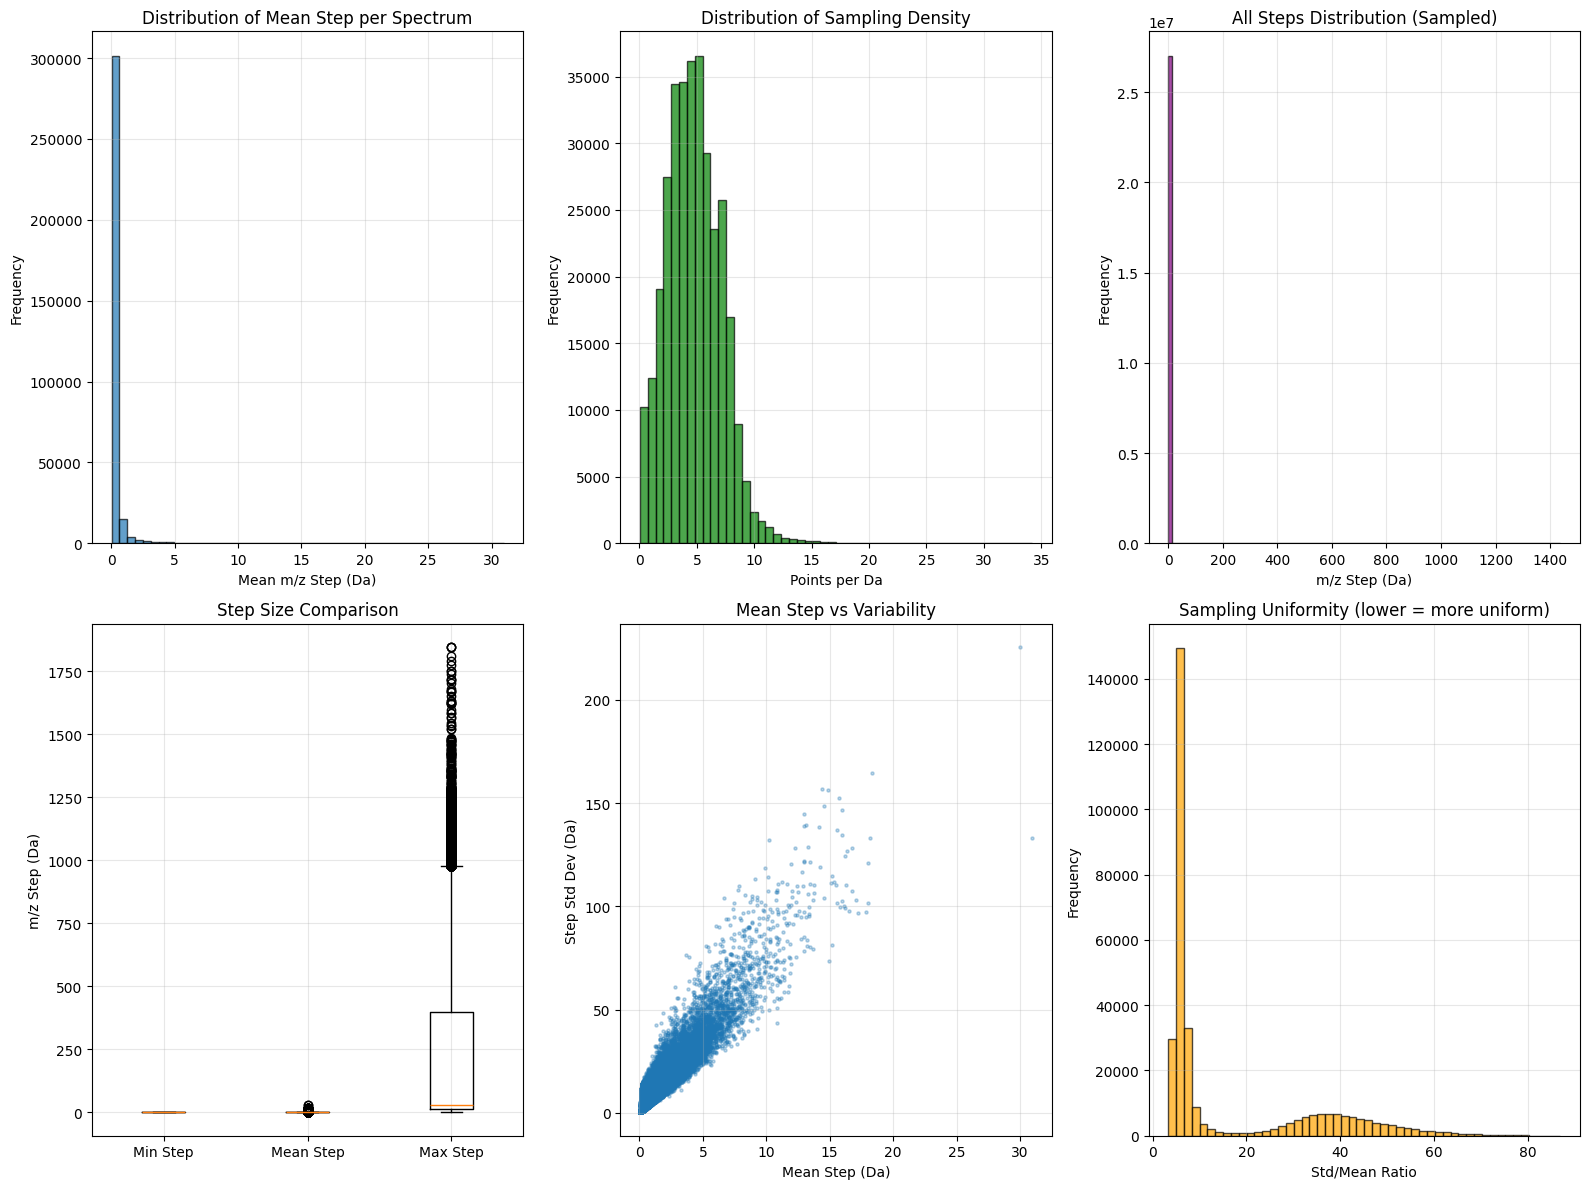

In [7]:
# Collect m/z sampling density statistics
mz_step_means = []      # Mean step between consecutive m/z values per spectrum
mz_step_mins = []       # Minimum step per spectrum
mz_step_maxs = []       # Maximum step per spectrum
mz_step_stds = []       # Std of steps per spectrum
all_steps = []          # Sampled steps for global distribution

file_density_stats = []

for mzml_file in sorted(mzml_files):
    filename = os.path.basename(mzml_file)
    print(f"Processing: {filename}")
    
    tree = ET.parse(mzml_file)
    root = tree.getroot()
    spectra = root.findall('.//mzml:spectrum', namespace)
    
    file_step_means = []
    
    for spectrum in spectra:
        binary_arrays = spectrum.findall('.//mzml:binaryDataArray', namespace)
        
        for binary_array in binary_arrays:
            mz_array = parse_binary_array(binary_array, namespace)
            
            if mz_array is not None and len(mz_array) > 1:
                # Calculate steps between consecutive m/z values
                steps = np.diff(mz_array)
                
                # Filter out any negative or zero steps (should be sorted, but just in case)
                steps = steps[steps > 0]
                
                if len(steps) > 0:
                    mz_step_means.append(np.mean(steps))
                    mz_step_mins.append(np.min(steps))
                    mz_step_maxs.append(np.max(steps))
                    mz_step_stds.append(np.std(steps))
                    file_step_means.append(np.mean(steps))
                    
                    # Sample steps for global distribution (every 50th)
                    all_steps.extend(steps[::50].tolist())
    
    if file_step_means:
        file_density_stats.append({
            'filename': filename,
            'mean_step': np.mean(file_step_means),
            'min_step': np.min(file_step_means),
            'max_step': np.max(file_step_means),
            'num_spectra': len(file_step_means)
        })

# Convert to numpy arrays
mz_step_means = np.array(mz_step_means)
mz_step_mins = np.array(mz_step_mins)
mz_step_maxs = np.array(mz_step_maxs)
mz_step_stds = np.array(mz_step_stds)
all_steps = np.array(all_steps)

# Calculate points per Da (inverse of mean step)
points_per_da = 1.0 / mz_step_means

# Print comprehensive statistics
print("\n" + "="*80)
print("M/Z SAMPLING DENSITY STATISTICS (All Spectra)")
print("="*80)

print(f"\nTotal spectra analyzed: {len(mz_step_means)}")

print(f"\n--- Mean m/z Step per Spectrum (Da) ---")
print(f"  Global min: {np.min(mz_step_means):.6f}")
print(f"  Global max: {np.max(mz_step_means):.6f}")
print(f"  Mean: {np.mean(mz_step_means):.6f}")
print(f"  Median: {np.median(mz_step_means):.6f}")
print(f"  Std Dev: {np.std(mz_step_means):.6f}")
print(f"  25th percentile: {np.percentile(mz_step_means, 25):.6f}")
print(f"  75th percentile: {np.percentile(mz_step_means, 75):.6f}")

print(f"\n--- Minimum m/z Step per Spectrum (Da) ---")
print(f"  Global min: {np.min(mz_step_mins):.6f}")
print(f"  Global max: {np.max(mz_step_mins):.6f}")
print(f"  Mean: {np.mean(mz_step_mins):.6f}")
print(f"  Median: {np.median(mz_step_mins):.6f}")

print(f"\n--- Maximum m/z Step per Spectrum (Da) ---")
print(f"  Global min: {np.min(mz_step_maxs):.6f}")
print(f"  Global max: {np.max(mz_step_maxs):.6f}")
print(f"  Mean: {np.mean(mz_step_maxs):.6f}")
print(f"  Median: {np.median(mz_step_maxs):.6f}")

print(f"\n--- Step Variability (Std Dev of steps per spectrum) ---")
print(f"  Mean std: {np.mean(mz_step_stds):.6f}")
print(f"  Median std: {np.median(mz_step_stds):.6f}")

print(f"\n--- Sampling Density (points per Da) ---")
print(f"  Min: {np.min(points_per_da):.2f}")
print(f"  Max: {np.max(points_per_da):.2f}")
print(f"  Mean: {np.mean(points_per_da):.2f}")
print(f"  Median: {np.median(points_per_da):.2f}")

print(f"\n--- All Steps Distribution (sampled) ---")
print(f"  Min step: {np.min(all_steps):.6f}")
print(f"  Max step: {np.max(all_steps):.6f}")
print(f"  Mean step: {np.mean(all_steps):.6f}")
print(f"  Median step: {np.median(all_steps):.6f}")

# Check for uniform vs variable sampling
uniformity_ratio = mz_step_stds / mz_step_means
print(f"\n--- Sampling Uniformity (std/mean ratio) ---")
print(f"  Mean ratio: {np.mean(uniformity_ratio):.4f}")
print(f"  Median ratio: {np.median(uniformity_ratio):.4f}")
print(f"  (Lower = more uniform sampling)")

# Per-file summary
print("\n" + "="*80)
print("PER-FILE SAMPLING DENSITY SUMMARY")
print("="*80)
for stats in file_density_stats:
    print(f"\n{stats['filename'][:50]}:")
    print(f"  Spectra: {stats['num_spectra']}")
    print(f"  Mean step: {stats['mean_step']:.6f} Da")
    print(f"  Points per Da: {1/stats['mean_step']:.2f}")

# Visualization
plt.figure(figsize=(16, 12))

plt.subplot(2, 3, 1)
plt.hist(mz_step_means, bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Mean m/z Step (Da)')
plt.ylabel('Frequency')
plt.title('Distribution of Mean Step per Spectrum')
plt.grid(True, alpha=0.3)

plt.subplot(2, 3, 2)
plt.hist(points_per_da, bins=50, edgecolor='black', alpha=0.7, color='green')
plt.xlabel('Points per Da')
plt.ylabel('Frequency')
plt.title('Distribution of Sampling Density')
plt.grid(True, alpha=0.3)

plt.subplot(2, 3, 3)
plt.hist(all_steps, bins=100, edgecolor='black', alpha=0.7, color='purple')
plt.xlabel('m/z Step (Da)')
plt.ylabel('Frequency')
plt.title('All Steps Distribution (Sampled)')
plt.grid(True, alpha=0.3)

plt.subplot(2, 3, 4)
plt.boxplot([mz_step_mins, mz_step_means, mz_step_maxs], 
            labels=['Min Step', 'Mean Step', 'Max Step'])
plt.ylabel('m/z Step (Da)')
plt.title('Step Size Comparison')
plt.grid(True, alpha=0.3)

plt.subplot(2, 3, 5)
plt.scatter(mz_step_means, mz_step_stds, alpha=0.3, s=5)
plt.xlabel('Mean Step (Da)')
plt.ylabel('Step Std Dev (Da)')
plt.title('Mean Step vs Variability')
plt.grid(True, alpha=0.3)

plt.subplot(2, 3, 6)
plt.hist(uniformity_ratio, bins=50, edgecolor='black', alpha=0.7, color='orange')
plt.xlabel('Std/Mean Ratio')
plt.ylabel('Frequency')
plt.title('Sampling Uniformity (lower = more uniform)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()